<a href="https://colab.research.google.com/github/Shantnu-Talokar/ML_Lab_ShantnuTalokar/blob/main/BonusAssignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First few rows of the dataset:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
Actual column names in the dataset: Index(['price', 'area', 'bedroom

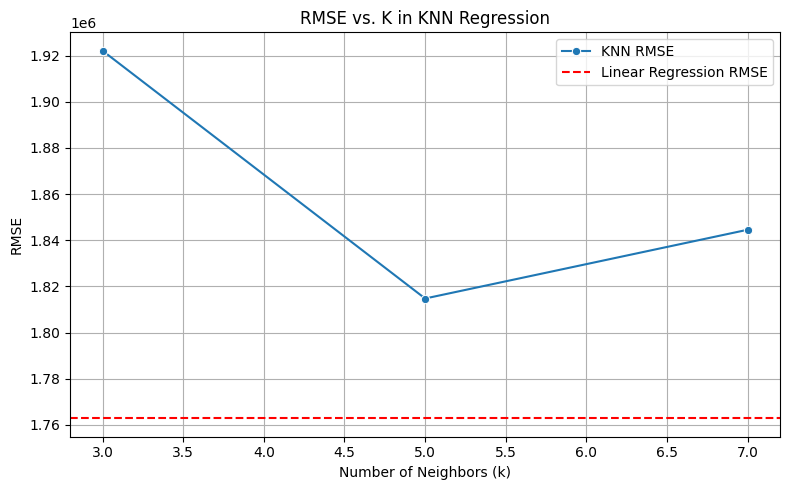

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

data = pd.read_csv("Housing.csv")

print("First few rows of the dataset:")
print(data.head())
print("Actual column names in the dataset:", data.columns)

X = data[['area', 'bedrooms', 'parking']]
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

lr_mae = mean_absolute_error(y_test, lr_preds)
lr_mse = mean_squared_error(y_test, lr_preds)
lr_rmse = np.sqrt(lr_mse)

print("\nLinear Regression Evaluation:")
print(f"MAE: {lr_mae:.2f}")
print(f"MSE: {lr_mse:.2f}")
print(f"RMSE: {lr_rmse:.2f}")

k_values = [3, 5, 7]
knn_results = []

for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    knn_preds = knn_model.predict(X_test)

    mae = mean_absolute_error(y_test, knn_preds)
    mse = mean_squared_error(y_test, knn_preds)
    rmse = np.sqrt(mse)

    knn_results.append({
        'k': k,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse
    })

    print(f"\nKNN Regression (k={k}) Evaluation:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")

results_df = pd.DataFrame(knn_results)

plt.figure(figsize=(8, 5))
sns.lineplot(x='k', y='RMSE', data=results_df, marker='o', label='KNN RMSE')
plt.axhline(y=lr_rmse, color='r', linestyle='--', label='Linear Regression RMSE')
plt.title("RMSE vs. K in KNN Regression")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("RMSE")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
